Importing Dependencies


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing

In [4]:
#loading the data from csv to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [5]:
#get first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [7]:
#getting information of dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking the distribution of categorical data

In [9]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical data

In [10]:
#encoding the "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

#encoding the "Selling_type" type column
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)

#encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

C:\Users\priya\AppData\Local\Temp\ipykernel_1520\891101789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
C:\Users\priya\AppData\Local\Temp\ipykernel_1520\891101789.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)
C:\Users\priya\AppData\Local\Temp\ipykernel_1520\891101789.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data and Target

In [12]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [18]:
#loading linear regression model
lin_reg_model = LinearRegression()


In [19]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [20]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [21]:
#R squared Error
error_score =  metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8796483009370217


Visualize the actual prices and predicted prices

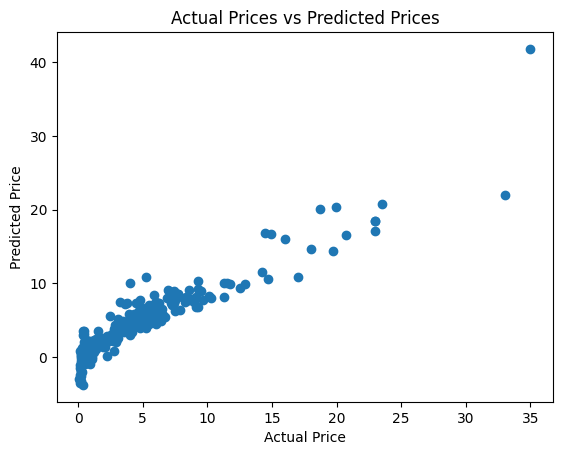

In [22]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [23]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [24]:
#R squared Error
error_score =  metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8365861023209662


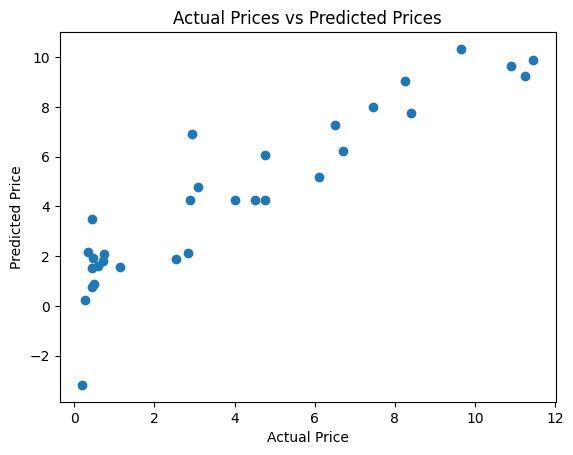

In [25]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [26]:
#loading the linear regression model
lass_reg_model = Lasso()

In [27]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [28]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [29]:
#R squared Error
error_score =  metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8424480718240743


Visualize the actual price and predicted price

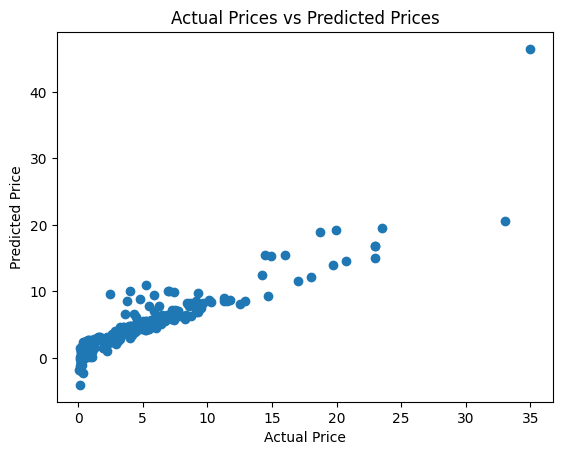

In [30]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [31]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [32]:
#R squared Error
error_score =  metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8365861023209662


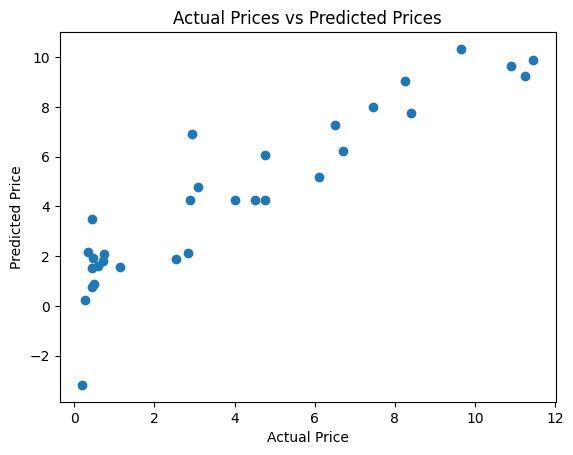

In [33]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()